In [1]:
from __future__ import print_function, division

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import datetime

In [4]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [190629, 190622, 190615, 190608]
turnstiles_df = get_data(week_nums)

In [5]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581


In [6]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [7]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581


In [8]:
#4 weeks of data
turnstiles_df.DATE.value_counts().sort_index()

06/01/2019    29066
06/02/2019    28968
06/03/2019    30022
06/04/2019    29513
06/05/2019    29484
06/06/2019    29213
06/07/2019    28745
06/08/2019    29030
06/09/2019    29133
06/10/2019    29351
06/11/2019    29113
06/12/2019    30023
06/13/2019    29276
06/14/2019    29008
06/15/2019    29605
06/16/2019    29322
06/17/2019    29421
06/18/2019    29599
06/19/2019    29614
06/20/2019    29556
06/21/2019    30360
06/22/2019    29217
06/23/2019    29170
06/24/2019    29479
06/25/2019    29437
06/26/2019    29417
06/27/2019    29464
06/28/2019    29779
Name: DATE, dtype: int64

In [9]:
from datetime import datetime as dt

In [10]:
# Take the date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [11]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457,2019-06-22 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465,2019-06-22 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491,2019-06-22 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541,2019-06-22 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581,2019-06-22 16:00:00


In [12]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(20)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
583293,R174,R034,00-00-03,125 ST,2019-06-08 00:00:00,2
194099,N045,R187,01-00-02,81 ST-MUSEUM,2019-06-01 17:00:00,2
193942,N045,R187,01-00-01,81 ST-MUSEUM,2019-06-02 17:00:00,2
194324,N045,R187,01-06-00,81 ST-MUSEUM,2019-06-11 21:00:00,2
660217,R249,R179,01-05-00,86 ST,2019-06-27 00:00:00,2
679477,R290,R161,00-00-00,KINGSBRIDGE RD,2019-06-07 05:00:00,2
660221,R249,R179,01-05-00,86 ST,2019-06-27 04:00:00,2
583125,R174,R034,00-00-02,125 ST,2019-06-08 00:00:00,2
193937,N045,R187,01-00-01,81 ST-MUSEUM,2019-06-01 17:00:00,2
194104,N045,R187,01-00-02,81 ST-MUSEUM,2019-06-02 17:00:00,2


In [13]:
# On 9/16, we seem to have two entries for same time.  Let's take a look
mask = ((turnstiles_df["C/A"] == "N045") & 
(turnstiles_df["UNIT"] == "R187") & 
(turnstiles_df["SCP"] == "01-00-00") & 
(turnstiles_df["STATION"] == "81 ST-MUSEUM") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2019, 6, 1).date()))
turnstiles_df[mask].head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
48238,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,06/01/2019,01:00:00,REGULAR,5253270,6696487,2019-06-01 01:00:00
48239,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,06/01/2019,05:00:00,REGULAR,5253277,6696494,2019-06-01 05:00:00
48240,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,06/01/2019,09:00:00,REGULAR,5253280,6696548,2019-06-01 09:00:00
48241,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,06/01/2019,13:00:00,REGULAR,5253356,6696877,2019-06-01 13:00:00
48242,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,06/01/2019,17:00:00,REGULAR,5253806,6697182,2019-06-01 17:00:00
48243,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,06/01/2019,17:00:00,RECOVR AUD,5253801,6697182,2019-06-01 17:00:00
48244,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,06/01/2019,21:00:00,REGULAR,5254017,6697270,2019-06-01 21:00:00


In [23]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [14]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
583293,R174,R034,00-00-03,125 ST,2019-06-08 00:00:00,2
194099,N045,R187,01-00-02,81 ST-MUSEUM,2019-06-01 17:00:00,2
193942,N045,R187,01-00-01,81 ST-MUSEUM,2019-06-02 17:00:00,2
194324,N045,R187,01-06-00,81 ST-MUSEUM,2019-06-11 21:00:00,2
660217,R249,R179,01-05-00,86 ST,2019-06-27 00:00:00,2


In [15]:
# Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [16]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [17]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,06/01/2019,7080105
1,A002,R051,02-00-00,59 ST,06/02/2019,7081001
2,A002,R051,02-00-00,59 ST,06/03/2019,7081661
3,A002,R051,02-00-00,59 ST,06/04/2019,7083157
4,A002,R051,02-00-00,59 ST,06/05/2019,7084813


In [18]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))

In [19]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,06/01/2019,7080105,NaN,NaN
1,A002,R051,02-00-00,59 ST,06/02/2019,7081001,06/01/2019,7080105.0
2,A002,R051,02-00-00,59 ST,06/03/2019,7081661,06/02/2019,7081001.0
3,A002,R051,02-00-00,59 ST,06/04/2019,7083157,06/03/2019,7081661.0
4,A002,R051,02-00-00,59 ST,06/05/2019,7084813,06/04/2019,7083157.0


In [20]:
turnstiles_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
136146,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/24/2019,5554,06/23/2019,5554.0
136147,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/25/2019,5554,06/24/2019,5554.0
136148,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/26/2019,5554,06/25/2019,5554.0
136149,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/27/2019,5554,06/26/2019,5554.0
136150,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/28/2019,5554,06/27/2019,5554.0


In [21]:
# Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [22]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,06/02/2019,7081001,06/01/2019,7080105.0
2,A002,R051,02-00-00,59 ST,06/03/2019,7081661,06/02/2019,7081001.0
3,A002,R051,02-00-00,59 ST,06/04/2019,7083157,06/03/2019,7081661.0
4,A002,R051,02-00-00,59 ST,06/05/2019,7084813,06/04/2019,7083157.0
5,A002,R051,02-00-00,59 ST,06/06/2019,7086363,06/05/2019,7084813.0


In [23]:
#create mask for the positive entries to delete neg entries from df. Roughly 1% of data.
positive_entries_mask = turnstiles_daily["ENTRIES"] > turnstiles_daily["PREV_ENTRIES"]
positive_entries_mask

1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
29         True
30         True
31         True
          ...  
136120    False
136121    False
136122    False
136123    False
136125    False
136126    False
136127    False
136128    False
136129    False
136130    False
136131    False
136132    False
136133    False
136134    False
136135    False
136136    False
136137    False
136138    False
136139    False
136140    False
136141    False
136142    False
136143    False
136144    False
136145    False
136146    False
136147    False
136148    False
136149    False
136150    False
Length: 131260, dtype: b

In [55]:
#applied mask, this should only have positive counters. Daily data is CLEAN!
turnstiles_daily = turnstiles_daily[positive_entries_mask]
turnstiles_daily

/Users/alexlou/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,06/02/2019,7081567,06/01/2019,7080817.0
2,A002,R051,02-00-00,59 ST,06/03/2019,7082949,06/02/2019,7081567.0
3,A002,R051,02-00-00,59 ST,06/04/2019,7084565,06/03/2019,7082949.0
4,A002,R051,02-00-00,59 ST,06/05/2019,7086109,06/04/2019,7084565.0
5,A002,R051,02-00-00,59 ST,06/06/2019,7087657,06/05/2019,7086109.0
6,A002,R051,02-00-00,59 ST,06/07/2019,7089268,06/06/2019,7087657.0
7,A002,R051,02-00-00,59 ST,06/08/2019,7090115,06/07/2019,7089268.0
8,A002,R051,02-00-00,59 ST,06/09/2019,7090874,06/08/2019,7090115.0
9,A002,R051,02-00-00,59 ST,06/10/2019,7092269,06/09/2019,7090874.0
10,A002,R051,02-00-00,59 ST,06/11/2019,7093803,06/10/2019,7092269.0


In [24]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we are not giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

990 3124900.0
1376289 8706.0
482 4317177.0
16 13966891.0
107 7245002.0
4050695 5903004.0
7246468 4050451.0
524298 5852785.0
592426 57022793.0
5572134 104607813.0
459183 4526857.0
458752 117849318.0
0 1392269.0
65 3465913.0
1828703710 9687851.0
137 4086508.0
80 2586370.0
1488 4676995.0
758 621485465.0
149 1252884.0
671 1650159.0
827 1523047.0
377 1047800.0
844 1251848.0
642 1572590.0
864 3126433.0
1119 1946729.0
1072 1214939.0
320 1309228.0
1547 1063331.0
1717 2409728.0
1502 1093196.0
1246 1461368.0
1865 1054368.0
1335 2725228.0
2389 2041812.0
1 1910177.0
226 1003604.0
544 3209824.0
2547 1395681.0
2172 2286196.0
2055 1696358.0
2062 1058855.0
0 1077938.0
2539 2793511.0
14 1327005.0
194 1426895.0
4653 1558358.0
990 2028732.0
452993428 1830432.0
881624264 1942743949.0
88839937 1258666104.0
704681890 2758420.0
868286381 101740116.0
206 1488298.0


### EDA Visualizations 

In [29]:
import seaborn as sns

In [25]:
turnstiles_daily['week'] = pd.to_datetime(turnstiles_daily['DATE']).dt.day_name()

In [26]:
weeklyDf = turnstiles_daily.groupby('week')['DAILY_ENTRIES'].mean().sort_values(ascending=False)

In [27]:
weeklyDf

week
Wednesday    1964.730649
Tuesday      1734.969661
Thursday     1697.532860
Saturday     1682.780738
Friday       1618.392267
Sunday        720.775533
Monday        637.128503
Name: DAILY_ENTRIES, dtype: float64

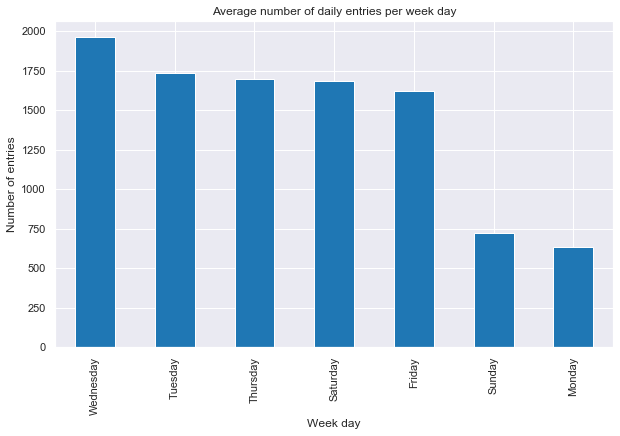

In [30]:
base_color = sns.color_palette()[0]
sns.set(style="darkgrid")
weeklyDf.plot(kind='bar',figsize=(10,6),color=base_color)
plt.title('Average number of daily entries per week day')
plt.xlabel('Week day')
plt.ylabel('Number of entries');

In [31]:
stations_daily = \
(turnstiles_daily.groupby(['STATION','DATE'])['DAILY_ENTRIES'].sum()
                 .reset_index())  

stations_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,06/02/2019,7053.0
1,1 AV,06/03/2019,5157.0
2,1 AV,06/04/2019,18130.0
3,1 AV,06/05/2019,17840.0
4,1 AV,06/06/2019,19426.0


In [32]:
top10_stations = \
    (stations_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .STATION.head(10))

top10_stations

257     JOURNAL SQUARE
212     EXCHANGE PLACE
234       GROVE STREET
314       PATH NEW WTC
61      34 ST-PENN STA
297       NEWARK BM BW
232    GRD CNTRL-42 ST
316    PAVONIA/NEWPORT
46               23 ST
351    THIRTY THIRD ST
Name: STATION, dtype: object

In [33]:
stations_daily_top10 = \
    stations_daily[stations_daily['STATION'].isin(top10_stations)]

Text(0.5, 1.0, 'The most populated stations')

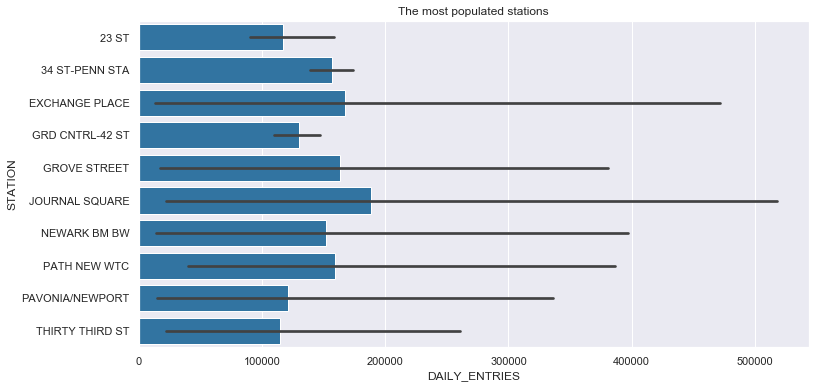

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(data=stations_daily_top10, x ='DAILY_ENTRIES',y='STATION',color=base_color)
plt.title('The most populated stations')

In [35]:
byDate = turnstiles_daily.groupby('DATE')['DAILY_ENTRIES'].sum().reset_index()

In [36]:
byDate

,DATE,DAILY_ENTRIES
0,06/02/2019,3522917.0
1,06/03/2019,3218460.0
2,06/04/2019,5888486.0
3,06/05/2019,9023010.0
4,06/06/2019,11343367.0
5,06/07/2019,11835683.0
6,06/08/2019,11836951.0
7,06/09/2019,3414443.0
8,06/10/2019,3263072.0
9,06/11/2019,15649301.0


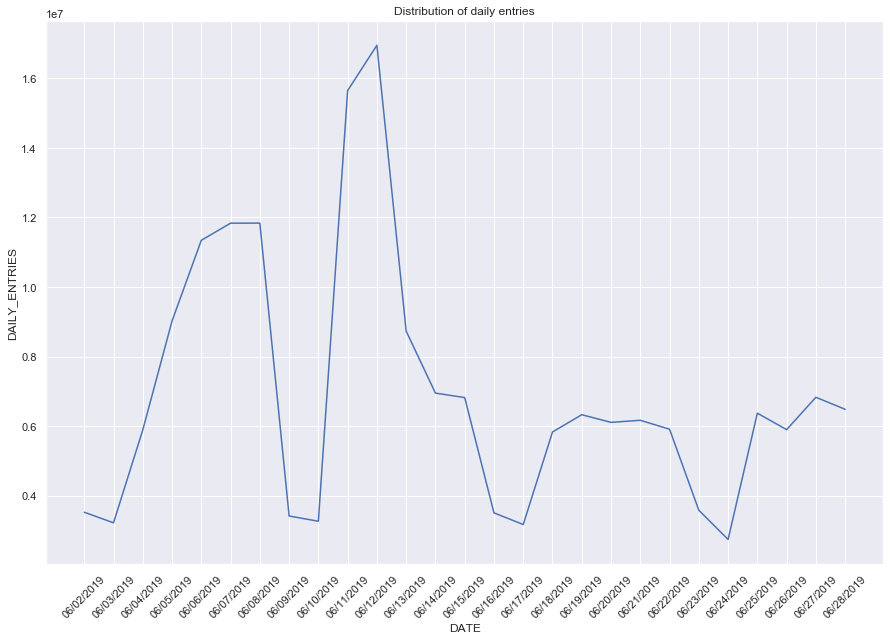

In [37]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot('DATE','DAILY_ENTRIES',data=byDate,palette='ch:2.5,.25',sort=False)
plt.xticks(rotation=45)
plt.title('Distribution of daily entries');

### Top Stations with their median income

In [53]:
top20_stations = \
    (stations_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .head(20))
top20_stations

#top20_stations.to_csv('./top20_stations.csv') #save top 20 busiest station and use local data to find their zip code and median income



,STATION,DAILY_ENTRIES
61,34 ST-PENN STA,4079062.0
232,GRD CNTRL-42 ST,3552131.0
59,34 ST-HERALD SQ,2880825.0
46,23 ST,2697108.0
352,TIMES SQ-42 ST,2471003.0
14,14 ST-UNION SQ,2456006.0
225,FULTON ST,2315168.0
68,42 ST-PORT AUTH,2309401.0
110,86 ST,1969292.0
172,CANAL ST,1843473.0


#### Cleaned Data to get Zip code and Median Household

We took the top 20 busiest stations by people and joined them with zip code and median income data to figure out areas were people are likely to attend and donate to the fundraiser. The zip code and median data was gotten from [here](https://www.psc.isr.umich.edu/dis/census/Features/tract2zip/).

We sorted the data by busiest station and median income. Further more filtering for areas where the median income is above $ 70,000.

In [64]:
#Link expires a week from July 6
df = pd.read_csv('https://filebin.net/eu42f99k9ee0x6md/top20_stations_joined_with_income_data.csv?t=guit1lbm') 

isRich = df['MEDIAN_HOUSEHOLD'] > 70000 # Filter for income greater than 70000
top20_stations_sorted = df[isRich].sort_values(by=['DAILY_ENTRIES', 'MEDIAN_HOUSEHOLD'], ascending=False)

top20_stations_sorted.head(5)

,STATION,DAILY_ENTRIES,ZIP_CODE,MEDIAN_HOUSEHOLD
0,34 ST-PENN STA,4079062.0,10001,71245
1,GRD CNTRL-42 ST,3552131.0,10017,102524
2,34 ST-HERALD SQ,2880825.0,10001,71245
3,23 ST,2697108.0,10010,93702
5,14 ST-UNION SQ,2456006.0,10003,89999


In [61]:
top10_stations_sorted = top20_stations_sorted.head(10)

Text(0.5, 1.0, 'The most populated stations by income')

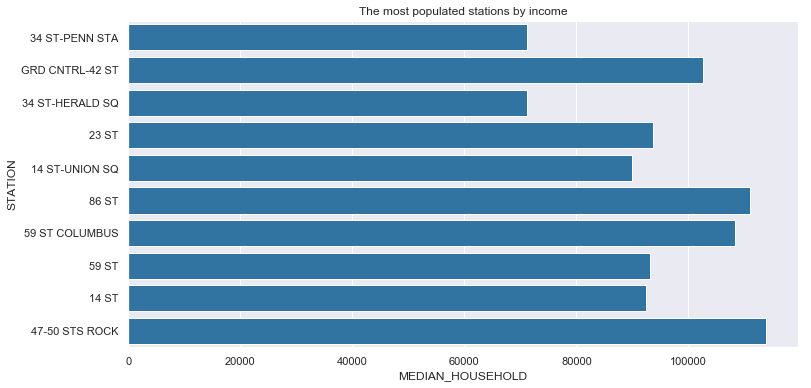

In [62]:
plt.figure(figsize=(12,6))
sns.barplot(data=top10_stations_sorted, x ='MEDIAN_HOUSEHOLD',y='STATION',color=base_color)
plt.title('The most populated stations by income')

### FINAL RECOMMENDATION